In [1]:
import tensorflow as tf
print(tf.__version__)

2.0.0


In [67]:
import numpy as np
import SimpleITK as sitk
import glob
import pandas as pd
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


os.listdir('./datasets')

['brats2015_testing_crop_mri.tfrecords',
 'dataset_helpers.py',
 'brats2015_validation_crop_mri.tfrecords',
 'VSD.Brain.XX.O.MR_T2.54515.mha',
 'brats2015_training_crop_mri.tfrecords']

In [151]:
path = './datasets/VSD.Brain.XX.O.MR_T2.54515.mha'

In [259]:
def load_itk(filename):
    ''' Read an .mha image and returns a numpy array, the origin coordinates and the voxel sizes in mm '''
    # Reads the image using SimpleITK
    itkimage = sitk.ReadImage(filename)

    # Convert the image to a  numpy array first and then shuffle the dimensions to get axis in the order z,x,y
    image = sitk.GetArrayFromImage(itkimage)
    # Here we have (z, y, x).
    image = image.transpose((0, 2, 1))

    # Read the origin of the ct_scan, will be used to convert the coordinates from world to voxel and vice versa.
    origin = np.array(itkimage.GetOrigin())[[2,0,1]]

    # Read the spacing along each dimension
    spacing = np.array(itkimage.GetSpacing())[[2,0,1]]

    return image, origin, spacing


In [260]:
image, origin, spacing = load_itk(path)

In [261]:
min_value, max_value = np.percentile(image, percentiles).astype(np.float32)
percentiles=[2, 98]

print('z dimension:', image.shape[0])
print('x dimension:', image.shape[1])
print('y dimension:', image.shape[2])
print('z origin:', origin[0])
print('x origin:', origin[1])
print('y origin:', origin[2])
print('z spacing:', spacing[0])
print('x spacing:', spacing[1])
print('y spacing:', spacing[2])
print('mri_max:', image.max().astype(np.float32))
print('mri_min:', image.min().astype(np.float32))
print('mri_lperc and mri_hperc: ', np.percentile(image, percentiles).astype(np.float32))

z dimension: 155
x dimension: 240
y dimension: 240
z origin: 0.0
x origin: 0.0
y origin: -239.0
z spacing: 1.0
x spacing: 1.0
y spacing: 1.0
mri_max: 1584.0
mri_min: 0.0
mri_lperc and mri_hperc:  [  0. 664.]


In [262]:
old = image

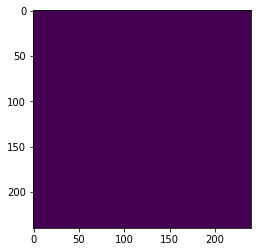

In [263]:
img = old[0,:,:]

imgplot = plt.imshow(img)

In [264]:
min_value, max_value

(0.0, 664.0)

In [265]:
def rescale(x, xmin, xmax, a, b):
    ''' Rescales x from range (xmin, xmax) to an y in (a, b)'''
    return (a + (b-a)*(x-xmin)/(xmax-xmin))  

center_crop=[180,180,128]
normalize_to='mri'
#dataset_min=train_min, dataset_max=train_max


if center_crop:
    image = image[int(image.shape[0] / 2 - center_crop[2] / 2):int(image.shape[0] / 2 + center_crop[2] / 2),
            int(image.shape[1] / 2 - center_crop[0] / 2):int(image.shape[1] / 2 + center_crop[0] / 2),
            int(image.shape[2] / 2 - center_crop[1] / 2):int(image.shape[2] / 2 + center_crop[1] / 2)]
    
image = rescale(image, min_value, max_value, 0, 1)

# Given an interval, values outside the interval are clipped to the interval edges. For example, if an interval 
# of [0, 1] is specified, values smaller than 0 become 0, and values larger than 1 become 1.
image = np.clip(image, 0, 1)



In [266]:
percentiles=[2, 98]

print('z dimension:', image.shape[0])
print('x dimension:', image.shape[1])
print('y dimension:', image.shape[2])
print('z origin:', origin[0])
print('x origin:', origin[1])
print('y origin:', origin[2])
print('z spacing:', spacing[0])
print('x spacing:', spacing[1])
print('y spacing:', spacing[2])
print('mri_max:', image.max().astype(np.float32))
print('mri_min:', image.min().astype(np.float32))
print('mri_lperc and mri_hperc: ', np.percentile(image, percentiles).astype(np.float32))

z dimension: 128
x dimension: 180
y dimension: 180
z origin: 0.0
x origin: 0.0
y origin: -239.0
z spacing: 1.0
x spacing: 1.0
y spacing: 1.0
mri_max: 1.0
mri_min: 0.0
mri_lperc and mri_hperc:  [0. 1.]


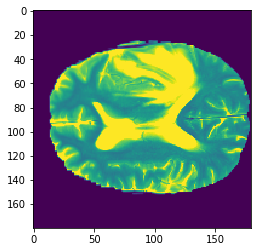

In [267]:
img = image[74,:,:]

imgplot = plt.imshow(img)

# Removed all the brain scan images that weren't needed. The firsts and the lasts scans in the z-dimension 
# were useless since, being a 3D scan, they were the top and the bottom of the brain (not the whole surface)
# so I did this in order to remove black regions and keep only the relevant parts of the brain

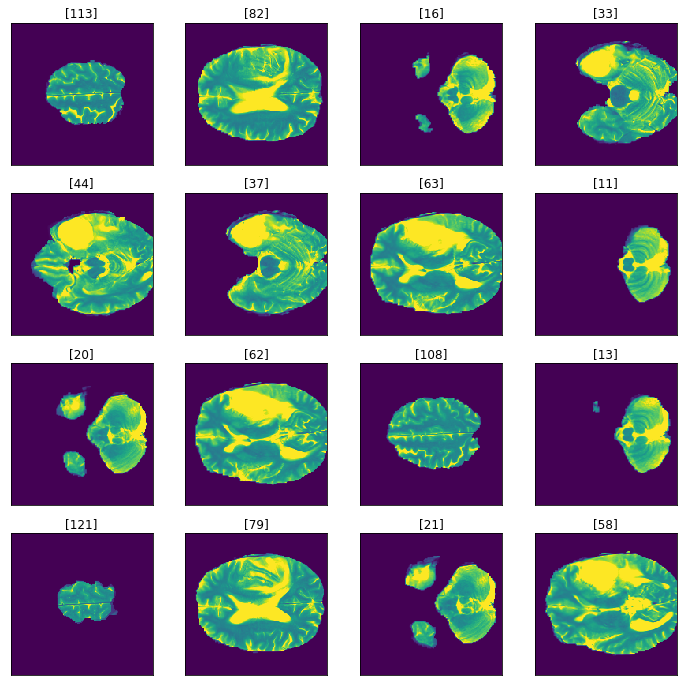

In [268]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(1 , figsize = (12 , 12))
n = 0
for i in range(16):
    n += 1 
    r = np.random.randint(0 , image.shape[0] , 1)
    plt.subplot(4 , 4 , n)
    plt.imshow(image[r[0]])
    plt.title('{}'.format(r))
    plt.xticks([]) , plt.yticks([])

In [269]:
image[0][0][0]

0.0

In [270]:
type(image)

numpy.ndarray

In [271]:
type(image[0][0][0])

numpy.float32

In [272]:
image.size

4147200

In [273]:
image.shape

(128, 180, 180)